## Bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import logging
import datetime
import time

import dash
from dash import dcc, html
from dash.dependencies import Input, Output

import calendar
import pandas as pd
import plotly.express as px
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, col
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from ipywidgets import interact, widgets
from matplotlib.dates import MonthLocator, DateFormatter
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.graph_objects as go
from pyspark.sql import functions as F
from pyspark.sql.functions import year, month
from sklearn.metrics.pairwise import euclidean_distances
from pyspark.sql.functions import year, month, sum as sum_
from scipy.spatial.distance import euclidean
from prophet import Prophet
from pyspark.sql.functions import col, countDistinct , desc , count , length
from pyspark.sql.functions import split, col, when
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, dayofmonth, last_day ,to_date, lit, isnull
from pyspark.sql.types import IntegerType
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from dateutil.relativedelta import relativedelta
from pyspark.sql.functions import date_format

import schedule
from pyspark.sql.functions import col, to_timestamp, date_format

import pyspark
import pandas as pd
import boto3
import sagemaker
import sagemaker.feature_store.feature_store as fs
import databricks.connect
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error

import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import plotly.graph_objects as go
from itertools import product
import random
import statsmodels.api as sm
import os

import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
from databricks.connect import DatabricksSession

# Get spark
spark = databricks.connect.DatabricksSession.builder.getOrCreate()

c:\Users\gusta\AppData\Local\pypoetry\Cache\virtualenvs\ltv-novo-aF9Dy8BA-py3.10\lib\site-packages\pydantic\_internal\_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


[02/05/25 15:53:16] INFO     Found credentials in shared credentials file: ~/.aws/credentials   ]8;id=624240;file://c:\Users\gusta\AppData\Local\pypoetry\Cache\virtualenvs\ltv-novo-aF9Dy8BA-py3.10\lib\site-packages\botocore\credentials.py\credentials.py]8;;\:]8;id=734124;file://c:\Users\gusta\AppData\Local\pypoetry\Cache\virtualenvs\ltv-novo-aF9Dy8BA-py3.10\lib\site-packages\botocore\credentials.py#1278\1278]8;;\

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\gusta\AppData\Local\sagemaker\sagemaker\config.yaml


## Tabelas

In [2]:
contrato_sdf = spark.table("dev.dw_redeok_model.tb_d_contract")
customer_sdf= spark.table("dev.dw_redeok_model.tb_d_customer")

## Tabelas Contratos

In [3]:
contrato_sdf.show(truncate=False)
contrato_sdf.count()

+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+--------+-------------------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+--------------------------+------------------+--------------------------+---------+-----------+------------------------------------+
|uuid                                |uuid_customer                       |uuid_partner                        |uuid_wallet                         |uuid_business_model                 |status  |start_date         |end_date           |status_reason|consumption_value|access_fee|financial_fee|due_day|payment_frequency|max_ticket_value_in_month|data_source_insert|created_at                |data_source_update|updated_at                |uuid_user|entity_type|uuid_partner_contract               |
+-------

61192

In [4]:
# Contar quantas chaves únicas existem em cada tabela
print("UUIDs Customers únicos em contrato_sdf:", contrato_sdf.select("uuid_customer").distinct().count())

print("UUIDs únicos em contrato_sdf:", contrato_sdf.select("uuid").distinct().count())

UUIDs Customers únicos em contrato_sdf: 57235
UUIDs únicos em contrato_sdf: 61192


In [5]:
# Agrupar por uuid_customer, contar e filtrar os que têm mais de um contrato
clientes_multiplos_contratos = contrato_sdf.groupBy("uuid_customer").count() \
    .filter(col("count") > 1) \
    .orderBy(col("count"), ascending=False)

# Exibir o resultado
clientes_multiplos_contratos.show(40, truncate=False)

+------------------------------------+-----+
|uuid_customer                       |count|
+------------------------------------+-----+
|9a2dde7c-04e6-4639-a24d-bfc7c39ce93c|275  |
|83a93536-475f-49dc-96dd-2d7081eb9b0d|84   |
|f41ebd28-9111-4fae-8dbf-51e3a43a61ce|19   |
|b034bd72-70bd-4251-9a8d-b08656b25508|17   |
|935c08da-bb9e-4cc9-8536-65492aad220e|14   |
|85c3d580-f467-4499-a818-d852791e9400|11   |
|c765a82a-072c-41bb-a253-66998011162d|10   |
|337bce7c-088c-457f-a2fe-570a6c9d2792|9    |
|08dd6f9a-5f31-46b7-a061-09bad0f5bade|9    |
|65255387-2b06-4cb6-91ec-7cc20262067e|8    |
|41a0ee2b-dd6c-43b7-8430-5adf1fdc523d|8    |
|014e0784-d1ea-40af-8d38-96493d33e779|8    |
|b93ce734-5c69-4fd5-90c2-368a9d08cbf5|7    |
|c0f90c1e-d032-4d20-8f91-d3755670cc87|7    |
|5a151ad9-d864-4ed3-b006-251a79094a62|6    |
|c6b515cb-87d1-4153-9d32-aa1d1f092285|6    |
|ef141ca9-5bb1-4ae8-81f2-3f03005b1700|6    |
|dda0965c-ba5a-4ed5-af98-d3c4e610b080|6    |
|97a0a465-7959-40c1-8784-ea1fc692ddca|5    |
|651b4178-

In [6]:
total_clientes_multiplos_contratos = clientes_multiplos_contratos.count()
print(f"Total de clientes com mais de um contrato: {total_clientes_multiplos_contratos}")

Total de clientes com mais de um contrato: 3088


- Na tabela contratos poussimos 61053 linhas porém  57102 clientes disintos e temos 3082 clientes com mais de um contrato

### Contratos por cliente

In [7]:


# Contar contratos por cliente
contratos_por_cliente = contrato_sdf.groupBy("uuid_customer").count().orderBy("count", ascending=False)

# Converter para Pandas para visualização
contratos_pd = contratos_por_cliente.toPandas()



# Renomear a coluna antes de fazer a contagem de frequência
contratos_pd = contratos_pd.rename(columns={"count": "num_contratos"})

# Contar a frequência de cada número de contratos
contratos_freq = contratos_pd["num_contratos"].value_counts().reset_index()
contratos_freq.columns = ["num_contratos", "frequencia"]

# Criar gráfico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=contratos_freq["num_contratos"], 
    y=contratos_freq["frequencia"],
    text=contratos_freq["frequencia"],  # Adiciona os valores acima das barras
    textposition='outside'  # Posiciona os rótulos fora das barras
))

# Configurar layout para melhorar a visualização
fig.update_layout(
    title="Distribuição do Número de Contratos por Cliente",
    xaxis_title="Número de Contratos por Cliente",
    yaxis_title="Frequência",
    bargap=0.2,
    height=600,  # Aumenta o tamanho do gráfico
    yaxis_type="log",  # Escala logarítmica para visualizar valores pequenos e grandes
)

# Exibir o gráfico
fig.show()

- exemplo esse caso , é um cliente com 11 contratos porem apenas um esta vigente  porem se reparar no start_date esse contrato vigente não é o mais antigo e nem o mais novo
Resposta:o contrato desse lado é o código do cliente do lado Oracle...existem vários códigos de cliente com o mesmo CNPJ e muitas vezes esses códigos ativam e desativam...isso pode causar essa confusão, pois estamos espelhando a base do Signet

In [8]:
uuid_especifico = "85c3d580-f467-4499-a818-d852791e9400"  # Substitua pelo UUID desejado

resultado_sdf = contrato_sdf.filter(contrato_sdf.uuid_customer == uuid_especifico)

# Mostrar resultado sem truncar

filtered_sdf_x = resultado_sdf.select("uuid_customer", "uuid", "status", "start_date", "end_date")

filtered_sdf_x.show(truncate=False)

+------------------------------------+------------------------------------+--------+-------------------+-------------------+
|uuid_customer                       |uuid                                |status  |start_date         |end_date           |
+------------------------------------+------------------------------------+--------+-------------------+-------------------+
|85c3d580-f467-4499-a818-d852791e9400|44612226-991c-40f1-8cec-ebcd29ced9bc|FINISHED|2010-11-26 02:00:00|2019-06-13 00:00:00|
|85c3d580-f467-4499-a818-d852791e9400|aff9e5e6-0463-4a25-9752-137797a22a24|FINISHED|2013-03-05 03:00:00|2016-07-18 00:00:00|
|85c3d580-f467-4499-a818-d852791e9400|4c523343-5d80-435b-80f3-4a2776eaed24|FINISHED|2014-01-28 02:00:00|2019-06-18 00:00:00|
|85c3d580-f467-4499-a818-d852791e9400|d73c1892-0dc1-4ea2-9612-515d33072dd8|SIGNED  |2012-11-12 02:00:00|NULL               |
|85c3d580-f467-4499-a818-d852791e9400|bb257f35-a3bb-4f1a-8905-c054ff01702d|FINISHED|2012-12-12 02:00:00|2015-02-25 03:00:00|


## Status

In [9]:
# Contar a quantidade de cada status
status_counts = contrato_sdf.groupBy(col("status")).count()

# Exibir o resultado
status_counts.show()

+-------------------+-----+
|             status|count|
+-------------------+-----+
|           APPROVED|   14|
|             SIGNED|19129|
|               NULL|  203|
|     IN_NEGOTIATION|  100|
|           FINISHED|41649|
|CANCELED_BY_PARTNER|   97|
+-------------------+-----+



In [10]:
# 1. Contar contratos onde end_date < start_date
contratos_invalidos = contrato_sdf.filter(col("end_date") < col("start_date")).count()

# 2. Contar contratos onde start_date é nulo e status é "SIGNED"
contratos_start_nulo_signed = contrato_sdf.filter((col("start_date").isNull()) & (col("status") == "SIGNED")).count()

# 3. Contar contratos com valores incomuns para end_date
# 3. Contar contratos com valores incomuns para end_date que começam com "0201"
contratos_valores_incomuns = contrato_sdf.filter(col("end_date").startswith("0201")).count()

# Exibir resultados
contratos_invalidos, contratos_start_nulo_signed, contratos_valores_incomuns

(111, 11, 49)

## Apenas  clientes com 1 Contrato

In [11]:
# Contar contratos por cliente
contratos_por_cliente = contrato_sdf.groupBy("uuid_customer").count()

# Filtrar apenas clientes com exatamente 1 contrato
clientes_com_um_contrato = contratos_por_cliente.filter(F.col("count") == 1)

# Juntar com a tabela original para obter todos os detalhes
sdf_filtrado = contrato_sdf.join(clientes_com_um_contrato, on="uuid_customer", how="inner")

# Exibir resultado
sdf_filtrado.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+--------------------+------------------+--------------------+---------+-----------+---------------------+-----+
|       uuid_customer|                uuid|        uuid_partner|         uuid_wallet| uuid_business_model|  status|         start_date|           end_date|status_reason|consumption_value|access_fee|financial_fee|due_day|payment_frequency|max_ticket_value_in_month|data_source_insert|          created_at|data_source_update|          updated_at|uuid_user|entity_type|uuid_partner_contract|count|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+-------------------+-------------+-----------------+----------+------------

In [12]:
sdf_filtrado.groupBy("uuid_customer").count().orderBy("count", ascending=False).show(5,truncate=False)

+------------------------------------+-----+
|uuid_customer                       |count|
+------------------------------------+-----+
|4a4ea083-2701-4dbf-aaf6-4d7d47c6efb3|1    |
|6935363c-f1b5-4ddf-84a8-d9f2352d6014|1    |
|005bca31-9c3c-47c8-bcf2-f424576da4cd|1    |
|e3d14160-9b9f-43b1-961a-d640966f47f8|1    |
|05d39b11-3f59-484b-b07f-681fd46a51d7|1    |
+------------------------------------+-----+
only showing top 5 rows



In [13]:
sdf_filtrado.count()

54147

- temos 54020 clientes que possui apenas 1 contrato com a ROK

In [14]:
# Contar a quantidade de cada status
status_counts = sdf_filtrado.groupBy(col("status")).count()

# Exibir o resultado
status_counts.show()

+-------------------+-----+
|             status|count|
+-------------------+-----+
|           APPROVED|    8|
|             SIGNED|17094|
|               NULL|  196|
|     IN_NEGOTIATION|   75|
|           FINISHED|36693|
|CANCELED_BY_PARTNER|   81|
+-------------------+-----+



In [15]:
from pyspark.sql.functions import col

# Filtrar apenas os status "FINISHED" e "SIGNED"
status_counts = sdf_filtrado.filter(col("status").isin("FINISHED", "SIGNED")).groupBy(col("status")).count()

# Exibir o resultado
status_counts.show()

+--------+-----+
|  status|count|
+--------+-----+
|  SIGNED|17094|
|FINISHED|36693|
+--------+-----+



In [16]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession


# Definir a data de hoje
data_hoje = F.current_date()

# Criar coluna de tempo de permanência
filtered_sdf = sdf_filtrado.withColumn(
    "end_date", F.when(F.col("end_date").isNull(), data_hoje).otherwise(F.col("end_date"))
).withColumn(
    "tempo_permanencia", F.datediff(F.col("end_date"), F.col("start_date"))  # Convertendo para anos
)

# Estatísticas básicas
filtered_sdf.describe("tempo_permanencia").show()

# Contas mais antigas
contas_mais_antigas = filtered_sdf.orderBy("start_date").show(truncate=False)


# Tempo médio de permanência
tempo_medio = filtered_sdf.select(F.avg("tempo_permanencia")).collect()[0][0]
print(f"Tempo médio de permanência: {tempo_medio:.2f} dias")



+-------+------------------+
|summary| tempo_permanencia|
+-------+------------------+
|  count|             53986|
|   mean|1642.2583077094062|
| stddev| 19911.84867297588|
|    min|           -663855|
|    max|             10457|
+-------+------------------+

+------------------------------------+------------------------------------+------------------------------------+-----------+------------------------------------+-------------------+----------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+--------------------------+------------------+--------------------------+------------------------------------+-----------+------------------------------------+-----+-----------------+
|uuid_customer                       |uuid                                |uuid_partner                        |uuid_wallet|uuid_business_model                 |status             |start_date|end_date           |st

- na tabela dev.dw_redeok_model.tb_d_contract, existem contratos com start_date nulo, além de valores incomuns para end_date, como 0201-07-04 00:00:00. Além disso, há contratos onde end_date é menor que start_date. Esses são alguns dos casos identificados.

In [17]:
from pyspark.sql.functions import col, when, datediff, current_date

# Definir a data de hoje
data_hoje = current_date()

filtered_sdf_2 = sdf_filtrado.withColumn(
    "end_date", F.when(F.col("end_date").isNull(), data_hoje).otherwise(F.col("end_date"))
).withColumn(
    "tempo_permanencia_dias", F.datediff(F.col("end_date"), F.col("start_date"))
).withColumn(
    "tempo_permanencia_anos", (F.col("tempo_permanencia_dias") / 365.25)  # Convertendo para anos
)

# Filtrar corretamente:
filtered_sdf_2 = filtered_sdf_2.filter(
    (~col("status").isin(["IN_NEGOTIATION", "CANCELED_BY_PARTNER", "APPROVED"])) & 
    (col("start_date").isNotNull()) & 
    (col("tempo_permanencia_dias") >= 0)  # Removendo quem tem tempo de permanência negativo
)

# Estatísticas básicas
filtered_sdf_2.describe("tempo_permanencia_anos").show()

# Contas mais antigas
contas_mais_antigas = filtered_sdf_2.orderBy("start_date").show(truncate=False)


# Tempo médio de permanência
tempo_medio = filtered_sdf_2.select(F.avg("tempo_permanencia_anos")).collect()[0][0]
print(f"Tempo médio de permanência: {tempo_medio:.2f} anos")

+-------+----------------------+
|summary|tempo_permanencia_anos|
+-------+----------------------+
|  count|                 53717|
|   mean|     6.111442688013175|
| stddev|     5.086671256747606|
|    min|                   0.0|
|    max|    28.629705681040384|
+-------+----------------------+

+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+--------+-------------------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+-----------------------+------------------+--------------------------+---------+-----------+------------------------------------+-----+----------------------+----------------------+
|uuid_customer                       |uuid                                |uuid_partner                        |uuid_wallet                         |uuid_bus

- Filtramos os casos com status ["IN_NEGOTIATION", "CANCELED_BY_PARTNER", "APPROVED"], pois suas datas ainda não estão regularizadas. Além disso, removemos registros onde a coluna start_date é nula (embora houvesse apenas um caso) e também eliminamos aqueles cujo tempo de permanência é nulo, já que correspondem a datas irregulares.

In [18]:
# Estatísticas básicas
filtered_sdf_2.describe("tempo_permanencia_anos").show()

# Contas mais antigas
contas_mais_antigas = filtered_sdf_2.orderBy("start_date").show(truncate=False)


# Tempo médio de permanência
tempo_medio = filtered_sdf_2.select(F.avg("tempo_permanencia_anos")).collect()[0][0]
print(f"Tempo médio de permanência: {tempo_medio:.2f} anos")

+-------+----------------------+
|summary|tempo_permanencia_anos|
+-------+----------------------+
|  count|                 53717|
|   mean|     6.111442688013175|
| stddev|     5.086671256747606|
|    min|                   0.0|
|    max|    28.629705681040384|
+-------+----------------------+

+------------------------------------+------------------------------------+------------------------------------+------------------------------------+------------------------------------+--------+-------------------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+-----------------------+------------------+--------------------------+---------+-----------+------------------------------------+-----+----------------------+----------------------+
|uuid_customer                       |uuid                                |uuid_partner                        |uuid_wallet                         |uuid_bus

In [19]:
filtered_sdf_2.count()

53717

In [20]:
# Contar a quantidade de cada status
status_counts = filtered_sdf_2.groupBy(col("status")).count()

# Exibir o resultado
status_counts.show()

+--------+-----+
|  status|count|
+--------+-----+
|  SIGNED|17093|
|FINISHED|36624|
+--------+-----+



- Ao filtrarmos os contratos que possuem apenas um registro e atendem às características especificadas, o total foi reduzido de 54.020 para 53.658, resultando em uma diminuição de 362 contratos.

## Distribuição do tempo de permanencia das Contas

In [26]:
import plotly.graph_objects as go
import pandas as pd

# Converter para Pandas para visualização
df_permanencia = filtered_sdf_2.select("tempo_permanencia_anos", "status").toPandas()

# Definir as faixas de tempo de permanência em anos
# Garantir que há valores para definir o bin máximo
max_anos = df_permanencia["tempo_permanencia_anos"].max()
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, max_anos + 1]  # Adiciona um espaço extra para o último bin
labels = [
    "0-1 ano",
    "1-2 anos",
    "2-3 anos",
    "3-4 anos",
    "4-5 anos",
    "5-6 anos",
    "6-7 anos",
    "7-8 anos",
    "8-9 anos",
    "9-10 anos",
    "10+ anos"
]

# Criar coluna categórica com os intervalos
df_permanencia["faixa_permanencia"] = pd.cut(df_permanencia["tempo_permanencia_anos"], bins=bins, labels=labels, right=True)

# Contar a frequência de cada status por faixa
df_faixas_status = df_permanencia.groupby(["faixa_permanencia", "status"]).size().unstack(fill_value=0)

# Reordenar colunas para que "SIGNED" apareça primeiro
df_faixas_status = df_faixas_status[["SIGNED", "FINISHED"]]

# Criar gráfico de barras agrupadas (lado a lado)
fig = go.Figure()

# Definir cores para os status
colors = {"SIGNED": "blue", "FINISHED": "red"}

# Adicionar cada status como uma barra separada na nova ordem
for status in df_faixas_status.columns:
    fig.add_trace(go.Bar(
        x=df_faixas_status.index,
        y=df_faixas_status[status],
        name=status,
        marker_color=colors.get(status, "gray")  # Define cor padrão caso outro status apareça
    ))

# Configurar layout do gráfico
fig.update_layout(
    title="Distribuição do Tempo de Permanência dos Contratos por Faixa (anos)",
    xaxis_title="Faixa de Tempo de Permanência (anos)",
    yaxis_title="Frequência",
    barmode="group"  # Barras lado a lado
)

# Exibir gráfico
fig.show()

# Calcular a porcentagem de cada status dentro de cada faixa de permanência
df_faixas_status_percent = df_faixas_status.div(df_faixas_status.sum(axis=1), axis=0) * 100

df_faixas_status_percent = df_faixas_status_percent.round(2).astype(str) + '%'

# Reordenar colunas para que "SIGNED" apareça primeiro
#df_faixas_status = df_faixas_status[["SIGNED", "FINISHED"]]
#df_faixas_status_percent = df_faixas_status_percent[["SIGNED", "FINISHED"]]
display(df_faixas_status)

display(df_faixas_status_percent)



C:\Users\gusta\AppData\Local\Temp\ipykernel_1936\4106835251.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



status             SIGNED  FINISHED
faixa_permanencia                  
0-1 ano              1695      5810
1-2 anos             1424      5278
2-3 anos             1184      3780
3-4 anos             1375      3023
4-5 anos              977      2558
5-6 anos             1324      2512
6-7 anos              783      2188
7-8 anos              682      2005
8-9 anos              929      1912
9-10 anos             968      1619
10+ anos             5749      5926

status             SIGNED FINISHED
faixa_permanencia                 
0-1 ano            22.58%   77.42%
1-2 anos           21.25%   78.75%
2-3 anos           23.85%   76.15%
3-4 anos           31.26%   68.74%
4-5 anos           27.64%   72.36%
5-6 anos           34.52%   65.48%
6-7 anos           26.35%   73.65%
7-8 anos           25.38%   74.62%
8-9 anos            32.7%    67.3%
9-10 anos          37.42%   62.58%
10+ anos           49.24%   50.76%

## Tempo de Permanencia das contas Ativas e finalizadas

In [23]:
# Criar boxplot comparando o tempo de permanência entre contratos ativos (SIGNED) e finalizados (FINISHED)
fig_ativos_vs_finalizados = px.box(
    df_permanencia,
    x="status",
    y="tempo_permanencia_anos",
    title="Comparação do Tempo de Permanência: Contratos Finalizados",
    labels={"tempo_permanencia_anos": "Tempo de Permanência (anos)", "status": "Status do Contrato"},
    color="status"
)

# Exibir gráfico
fig_ativos_vs_finalizados.show()

##

## BoxPlot Tempo de Permanencia por Inicio de Contrato

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

# Converter para Pandas
df_permanencia = filtered_sdf_2.select("start_date", "tempo_permanencia_anos", "status").toPandas()

# Converter start_date para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])

# Criar coluna com o ano do contrato
df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Obter o ano atual
ano_atual = datetime.today().year

# Filtrar por status
df_finished = df_permanencia[df_permanencia["status"] == "FINISHED"]
df_signed = df_permanencia[df_permanencia["status"] == "SIGNED"]

# Calcular estatísticas por ano para cada status
estatisticas_finished = df_finished.groupby("ano_inicio")["tempo_permanencia_anos"].agg(["median", "mean"]).reset_index()
estatisticas_signed = df_signed.groupby("ano_inicio")["tempo_permanencia_anos"].agg(["median", "mean"]).reset_index()

# Calcular o tempo máximo possível para cada ano
estatisticas_finished["tempo_maximo_possivel"] = ano_atual - estatisticas_finished["ano_inicio"]
estatisticas_signed["tempo_maximo_possivel"] = ano_atual - estatisticas_signed["ano_inicio"]

# Criar gráfico interativo
fig = go.Figure()

# Mediana do tempo de permanência por ano (FINISHED)
fig.add_trace(go.Scatter(
    x=estatisticas_finished["ano_inicio"],
    y=estatisticas_finished["median"],
    mode="lines+markers",
    name="Mediana (FINISHED)",
    line=dict(color="blue", dash="dot")
))

# Média do tempo de permanência por ano (FINISHED)
fig.add_trace(go.Scatter(
    x=estatisticas_finished["ano_inicio"],
    y=estatisticas_finished["mean"],
    mode="lines+markers",
    name="Média (FINISHED)",
    line=dict(color="blue")
))

# Mediana do tempo de permanência por ano (SIGNED)
fig.add_trace(go.Scatter(
    x=estatisticas_signed["ano_inicio"],
    y=estatisticas_signed["median"],
    mode="lines+markers",
    name="Mediana (SIGNED)",
    line=dict(color="green", dash="dot")
))

# Média do tempo de permanência por ano (SIGNED)
fig.add_trace(go.Scatter(
    x=estatisticas_signed["ano_inicio"],
    y=estatisticas_signed["mean"],
    mode="lines+markers",
    name="Média (SIGNED)",
    line=dict(color="green")
))

# Linha do tempo máximo possível
fig.add_trace(go.Scatter(
    x=estatisticas_finished["ano_inicio"],
    y=estatisticas_finished["tempo_maximo_possivel"],
    mode="lines",
    name="Tempo Máximo Possível",
    line=dict(color="red", dash="dash")
))

# Layout do gráfico
fig.update_layout(
    title="Detecção do Viés no Tempo de Permanência",
    xaxis_title="Ano de Início do Contrato",
    yaxis_title="Tempo de Permanência (anos)",
    showlegend=True
)

# Exibir gráfico
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

# Converter para Pandas
df_permanencia = filtered_sdf_2.select("start_date", "tempo_permanencia_anos").toPandas()

# Converter start_date para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])

# Criar coluna com o ano do contrato
df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Obter o ano atual
ano_atual = datetime.today().year

# Calcular estatísticas por ano
estatisticas_por_ano = df_permanencia.groupby("ano_inicio")["tempo_permanencia_anos"].agg(["median", "mean"]).reset_index()

# Calcular o tempo máximo possível para cada ano (tempo entre ano de início e hoje)
estatisticas_por_ano["tempo_maximo_possivel"] = ano_atual - estatisticas_por_ano["ano_inicio"]

# Calcular a diferença entre o tempo máximo e a mediana
estatisticas_por_ano["diferenca"] = estatisticas_por_ano["tempo_maximo_possivel"] - estatisticas_por_ano["median"]

# Identificar o primeiro ano onde a diferença for menor que um limite (exemplo: 2 anos)
ano_limite_vies = estatisticas_por_ano.loc[estatisticas_por_ano["diferenca"] < 2, "ano_inicio"].min()

# Criar gráfico interativo
fig = go.Figure()

# Linha da mediana do tempo de permanência por ano
fig.add_trace(go.Scatter(
    x=estatisticas_por_ano["ano_inicio"],
    y=estatisticas_por_ano["median"],
    mode="lines+markers",
    name="Mediana do Tempo de Permanência",
    line=dict(color="blue")
))

# Linha da média do tempo de permanência por ano
fig.add_trace(go.Scatter(
    x=estatisticas_por_ano["ano_inicio"],
    y=estatisticas_por_ano["mean"],
    mode="lines+markers",
    name="Média do Tempo de Permanência",
    line=dict(color="green")
))

# Linha do tempo máximo possível
fig.add_trace(go.Scatter(
    x=estatisticas_por_ano["ano_inicio"],
    y=estatisticas_por_ano["tempo_maximo_possivel"],
    mode="lines",
    name="Tempo Máximo Possível",
    line=dict(color="red", dash="dash")
))



# Layout do gráfico
fig.update_layout(
    title="Detecção do Viés no Tempo de Permanência",
    xaxis_title="Ano de Início do Contrato",
    yaxis_title="Tempo de Permanência (anos)",
    showlegend=True
)

# Exibir gráfico
fig.show()

# Exibir o ano identificado como enviesado
print(f"O primeiro ano onde os contratos finalizados são afetados pelo tempo transcorrido é: {ano_limite_vies}")


O primeiro ano onde os contratos finalizados são afetados pelo tempo transcorrido é: 2001


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

# Converter para Pandas
df_permanencia = filtered_sdf_2.select("start_date", "tempo_permanencia_anos").toPandas()

# Converter start_date para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])

# Criar coluna com o ano do contrato
df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Obter o ano atual
ano_atual = datetime.today().year

# Calcular o tempo máximo possível para cada ano
df_permanencia["tempo_maximo_possivel"] = ano_atual - df_permanencia["ano_inicio"]

# Criar Boxplot
fig = px.box(
    df_permanencia,
    x="ano_inicio",  # Ano do início do contrato no eixo X
    y="tempo_permanencia_anos",  # Tempo de permanência no eixo Y
    points="all",  # Mostra todos os pontos para visualizar outliers
    title="Boxplot da Distribuição do Tempo de Permanência por Ano de Início do Contrato",
    labels={"ano_inicio": "Ano de Início do Contrato", "tempo_permanencia_anos": "Tempo de Permanência (anos)"},
    color="ano_inicio"  # Diferencia os anos por cor
)

# Adicionar linha guia do tempo máximo possível
fig.add_trace(
    go.Scatter(
        x=df_permanencia["ano_inicio"].unique(),
        y=(ano_atual - df_permanencia["ano_inicio"].unique()),  # Tempo máximo possível
        mode="lines",
        name="Tempo Máximo Possível",
        line=dict(color="red", dash="dash")
    )
)



# Exibir gráfico
fig.show()

# Exibir o ano identificado como enviesado
print(f"O primeiro ano onde os contratos finalizados são afetados pelo tempo transcorrido é: {ano_limite_vies}")


# Analise Churn

## Taxa de Churn Por Inicio de Contrato / Distribuição do tempo de Permanencia dos Contratos Finalizados

In [24]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Converter para Pandas
df_permanencia = filtered_sdf_2.select("uuid_customer","start_date", "end_date", "tempo_permanencia_anos", "status").toPandas()

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar coluna com o ano do contrato
df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Criar coluna indicando se o contrato foi finalizado (Churn)
df_permanencia["churn"] = df_permanencia["status"].apply(lambda x: 1 if x == "FINISHED" else 0)

# Calcular taxa de churn por ano
df_churn = df_permanencia.groupby("ano_inicio")["churn"].mean().reset_index()

# Criar gráfico de evolução do churn por ano
fig_churn = px.line(
    df_churn,
    x="ano_inicio",
    y="churn",
    title="Taxa de Churn por Ano de Início do Contrato",
    labels={"ano_inicio": "Ano de Início", "churn": "Taxa de Churn"},
    markers=True
)

# Criar histograma do tempo de permanência dos contratos finalizados
fig_hist_churn = px.histogram(
    df_permanencia[df_permanencia["status"] == "FINISHED"],
    x="tempo_permanencia_anos",
    nbins=50,
    title="Distribuição do Tempo de Permanência dos Contratos Finalizados",
    labels={"tempo_permanencia_anos": "Tempo de Permanência (anos)"},
    marginal="box"  # Adiciona um boxplot para melhor visualização
)

# Exibir gráficos
fig_churn.show()
fig_hist_churn.show()

Taxa de churn alta nos primeiros anos (1995-2000)

Nos anos iniciais, quase 100% dos contratos foram finalizados. Isso pode indicar que os contratos antigos já tiveram tempo suficiente para serem encerrados.
Há uma variação nos anos seguintes, mas a taxa se mantém elevada.
Estabilização entre 2005 e 2020

A partir de 2005, a taxa de churn se mantém relativamente estável, com valores entre 50% e 80%.
Isso pode indicar que os contratos desse período possuem características semelhantes, como tempo médio de permanência semelhante ou regras contratuais mais estáveis.
Queda acentuada no churn após 2020

A partir de 2020, a taxa de churn começa a diminuir drasticamente, chegando a quase 0% nos anos mais recentes.
Isso pode ser explicado por dois fatores principais:
Contratos ainda ativos: Como esses contratos começaram recentemente, eles ainda não tiveram tempo suficiente para serem finalizados.
Mudanças no modelo de negócios: Pode ser que contratos mais novos tenham regras diferentes que prolongam sua duração.

O eixo X representa o tempo de permanência (em dias).
O eixo Y representa a quantidade de contratos finalizados com aquele tempo de permanência.
O boxplot superior ajuda a visualizar a distribuição dos tempos de permanência.
🔎 Interpretação
Maioria dos contratos dura menos de 2.000 dias (~5 anos)

A maior parte dos contratos finalizados está concentrada no intervalo de 0 a 2.000 dias, com um pico inicial próximo de 500 dias (~1,5 anos).
Isso indica que muitos contratos são encerrados nos primeiros anos.
Distribuição assimétrica (cauda longa à direita)

Embora a maioria dos contratos tenha duração curta, alguns contratos duraram muito mais (mais de 8.000 dias, ou 22 anos!).
Esses contratos de longa duração são considerados outliers, mas podem representar contratos antigos ou clientes de maior fidelidade.
Boxplot indica grande variação

O percentil 25% dos contratos está abaixo de ~500 dias.
O percentil 50% (mediana) está entre 1.000 e 1.500 dias (~3 a 4 anos).
O percentil 75% está por volta de 2.500 a 3.000 dias (~7 a 8 anos).
Acima disso, temos contratos com duração muito alta, mas menos frequentes.


A maior parte dos contratos finalizados dura menos de 5 anos.
Alguns contratos duram mais de 20 anos, mas são exceções.
Podemos analisar o que faz alguns contratos durarem tanto tempo (exemplo: tipo de cliente, tipo de contrato, etc.).
Para prever o tempo de permanência dos contratos ativos, podemos usar modelos de sobrevivência (ex: Kaplan-Meier ou regressão de Cox).

## Probabilidade de um contrato continuar ativo pelo tempo de Permanencia

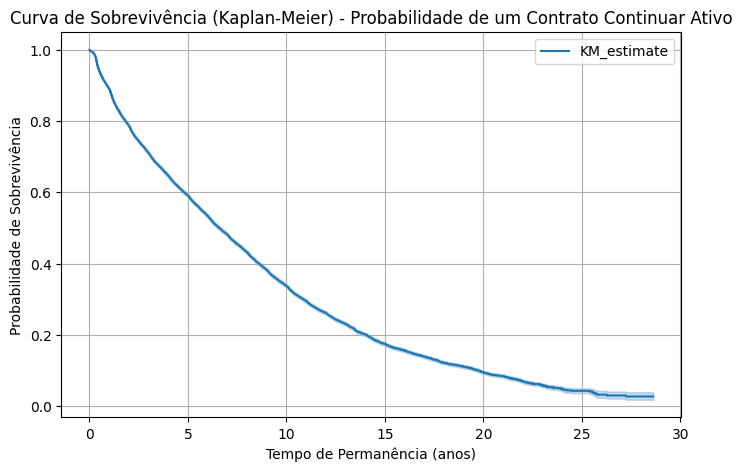

In [31]:
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar coluna do ano e mês de cancelamento
df_permanencia["ano_cancelamento"] = df_permanencia["end_date"].dt.year
df_permanencia["mes_cancelamento"] = df_permanencia["end_date"].dt.month

# Criar coluna do ano de início do contrato
df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Criar variável event_observed (1 se o contrato foi finalizado, 0 se ainda está ativo)
df_permanencia["event_observed"] = (df_permanencia["status"] == "FINISHED").astype(int)

# Criar e ajustar o modelo de Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(df_permanencia["tempo_permanencia_anos"], event_observed=df_permanencia["event_observed"])

# Plotar a curva de sobrevivência
plt.figure(figsize=(8, 5))
kmf.plot()
plt.title("Curva de Sobrevivência (Kaplan-Meier) - Probabilidade de um Contrato Continuar Ativo")
plt.xlabel("Tempo de Permanência (anos)")
plt.ylabel("Probabilidade de Sobrevivência")
plt.grid(True)
plt.show()


In [33]:
filtered_sdf_2_filtered = filtered_sdf_2.filter(filtered_sdf_2.tempo_permanencia_anos <= 0)
filtered_sdf_2_filtered.show()


+--------------------+--------------------+--------------------+--------------------+--------------------+--------+-------------------+-------------------+-------------+-----------------+----------+-------------+-------+-----------------+-------------------------+------------------+--------------------+------------------+--------------------+---------+-----------+---------------------+-----+----------------------+----------------------+
|       uuid_customer|                uuid|        uuid_partner|         uuid_wallet| uuid_business_model|  status|         start_date|           end_date|status_reason|consumption_value|access_fee|financial_fee|due_day|payment_frequency|max_ticket_value_in_month|data_source_insert|          created_at|data_source_update|          updated_at|uuid_user|entity_type|uuid_partner_contract|count|tempo_permanencia_dias|tempo_permanencia_anos|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------+---

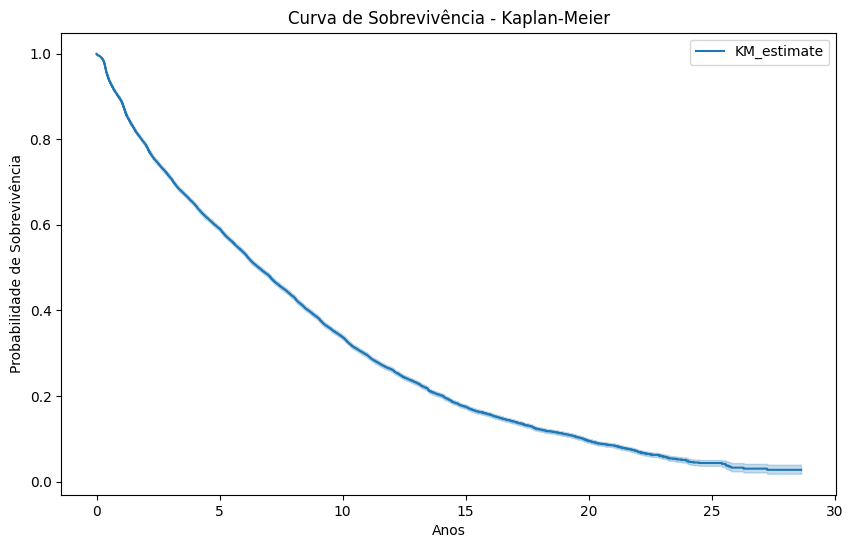

<lifelines.CoxPHFitter: fitted with 53688 total observations, 17079 right-censored observations>
             duration col = 'tempo_permanencia_anos'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 53688
number of events observed = 36609
   partial log-likelihood = -367737.28
         time fit was run = 2025-02-03 22:39:20 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 735474.57
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

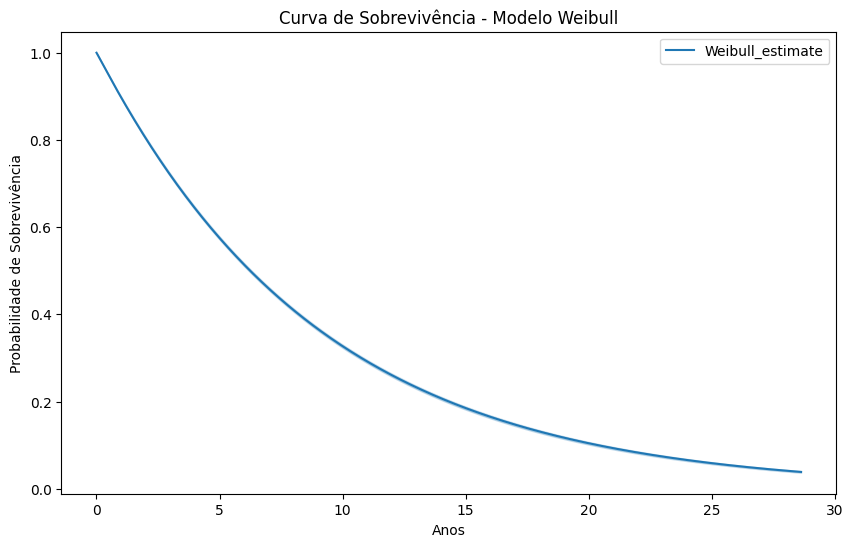

In [36]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines import WeibullAFTFitter, WeibullFitter



df = filtered_sdf_2.select("uuid_customer","start_date", "end_date", "tempo_permanencia_anos", "status").toPandas()

df = df[df["tempo_permanencia_anos"] > 0]

# Criando a variável de evento (1 = finalizou, 0 = censurado)
df['event'] = np.where(df['status'] == 'FINISHED', 1, 0)

# Exibir o DataFrame processado
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Dados Processados", dataframe=df)


import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

# Ajustar o modelo
kmf.fit(df["tempo_permanencia_anos"], event_observed=df["event"])

# Plotar a curva de sobrevivência
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Curva de Sobrevivência - Kaplan-Meier")
plt.xlabel("Anos")
plt.ylabel("Probabilidade de Sobrevivência")
plt.show()


cph = CoxPHFitter()

# Ajustar o modelo (por enquanto, só com a duração e evento)
df_model = df[['tempo_permanencia_anos', 'event']]
cph.fit(df_model, duration_col='tempo_permanencia_anos', event_col='event')

# Mostrar coeficientes
cph.print_summary()



wf = WeibullFitter()
wf.fit(df["tempo_permanencia_anos"], event_observed=df["event"])

# Plotando a função de sobrevivência estimada pelo Weibull
plt.figure(figsize=(10, 6))
wf.plot_survival_function()
plt.title("Curva de Sobrevivência - Modelo Weibull")
plt.xlabel("Anos")
plt.ylabel("Probabilidade de Sobrevivência")
plt.show()



## Distribuição Churn por Mês/Ano

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar colunas do ano e mês de cancelamento
df_permanencia["ano_cancelamento"] = df_permanencia["end_date"].dt.year
df_permanencia["mes_cancelamento"] = df_permanencia["end_date"].dt.month

# Filtrar apenas contratos finalizados
df_churn = df_permanencia[df_permanencia["status"] == "FINISHED"].copy()

# Criar coluna do ano de início do contrato
df_churn["ano_inicio"] = df_churn["start_date"].dt.year

# Calcular taxa de churn mensal
churn_mensal = df_churn.groupby("mes_cancelamento").size().reset_index(name="churn_count")

# Calcular taxa de churn anual
churn_anual = df_churn.groupby("ano_cancelamento").size().reset_index(name="churn_count")

# Criar gráfico de churn mensal
fig_churn_mensal = px.bar(
    churn_mensal,
    x="mes_cancelamento",
    y="churn_count",
    title="Distribuição Mensal do Churn",
    labels={"mes_cancelamento": "Mês", "churn_count": "Número de Cancelamentos"},
    text_auto=True
)

# Criar gráfico de churn anual
fig_churn_anual = px.bar(
    churn_anual,
    x="ano_cancelamento",
    y="churn_count",
    title="Distribuição Anual do Churn",
    labels={"ano_cancelamento": "Ano", "churn_count": "Número de Cancelamentos"},
    text_auto=True
)

# Exibir gráficos
fig_churn_mensal.show()
fig_churn_anual.show()


In [ ]:
import pandas as pd
import plotly.express as px
from datetime import datetime

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar colunas do ano e mês de cancelamento (para FINISHED)
df_permanencia["ano_cancelamento"] = df_permanencia["end_date"].dt.year
df_permanencia["mes_cancelamento"] = df_permanencia["end_date"].dt.month

# Criar colunas do ano e mês de assinatura (para SIGNED)
df_permanencia["ano_assinatura"] = df_permanencia["start_date"].dt.year
df_permanencia["mes_assinatura"] = df_permanencia["start_date"].dt.month

# Criar DataFrames separados para FINISHED e SIGNED
df_finished = df_permanencia[df_permanencia["status"] == "FINISHED"]
df_signed = df_permanencia[df_permanencia["status"] == "SIGNED"]

# Criar um DataFrame com todos os meses possíveis para evitar valores ausentes
todos_meses = pd.DataFrame({'mes_cancelamento': range(1, 13)})
todos_anos = pd.DataFrame({'ano_cancelamento': range(df_permanencia["ano_inicio"].min(), datetime.today().year + 1)})

# Contar contratos finalizados e assinados por mês
churn_mensal_finished = df_finished.groupby("mes_cancelamento").size().reset_index(name="churn_count")
churn_mensal_signed = df_signed.groupby("mes_assinatura").size().reset_index(name="churn_count")

# Ajustar os nomes das colunas para mesclar corretamente
churn_mensal_signed.rename(columns={"mes_assinatura": "mes_cancelamento"}, inplace=True)

# Adicionar a coluna status
churn_mensal_finished["status"] = "FINISHED"
churn_mensal_signed["status"] = "SIGNED"

# Unir os DataFrames mensais e garantir todos os meses presentes
churn_mensal = pd.concat([churn_mensal_finished, churn_mensal_signed], ignore_index=True)
churn_mensal = todos_meses.merge(churn_mensal, on="mes_cancelamento", how="left").fillna(0)

# Contar contratos finalizados e assinados por ano
churn_anual_finished = df_finished.groupby("ano_cancelamento").size().reset_index(name="churn_count")
churn_anual_signed = df_signed.groupby("ano_assinatura").size().reset_index(name="churn_count")

# Ajustar os nomes das colunas para mesclar corretamente
churn_anual_signed.rename(columns={"ano_assinatura": "ano_cancelamento"}, inplace=True)

# Adicionar a coluna status
churn_anual_finished["status"] = "FINISHED"
churn_anual_signed["status"] = "SIGNED"

# Unir os DataFrames anuais e garantir todos os anos presentes
churn_anual = pd.concat([churn_anual_finished, churn_anual_signed], ignore_index=True)
churn_anual = todos_anos.merge(churn_anual, on="ano_cancelamento", how="left").fillna(0)

# Criar gráfico de churn mensal com barras agrupadas por status
fig_churn_mensal = px.bar(
    churn_mensal,
    x="mes_cancelamento",
    y="churn_count",
    color="status",
    barmode="group",
    title="Distribuição Mensal do Churn e Assinaturas",
    labels={"mes_cancelamento": "Mês", "churn_count": "Número de Contratos", "status": "Status do Contrato"},
    text_auto=True
)

# Criar gráfico de churn anual com escala logarítmica
fig_churn_anual = px.bar(
    churn_anual,
    x="ano_cancelamento",
    y="churn_count",
    color="status",
    barmode="group",
    title="Distribuição Anual do Churn e Assinaturas (Escala Logarítmica)",
    labels={"ano_cancelamento": "Ano", "churn_count": "Número de Contratos", "status": "Status do Contrato"},
    text_auto=True
)

# Definir eixo Y em escala logarítmica para o gráfico anual
fig_churn_anual.update_layout(yaxis_type="log")

# Exibir gráficos
fig_churn_mensal.show()
fig_churn_anual.show()


In [ ]:
churn_mensal.head()

mes_cancelamento  churn_count    status
0                 1         3134  FINISHED
1                 1         1359    SIGNED
2                 2         3021  FINISHED
3                 2         1251    SIGNED
4                 3         3222  FINISHED

## Comparação Churns Antes e depois de alguma data

In [56]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar coluna do ano e mês de cancelamento
df_permanencia["ano_cancelamento"] = df_permanencia["end_date"].dt.year
df_permanencia["mes_cancelamento"] = df_permanencia["end_date"].dt.month

# Filtrar apenas contratos finalizados
df_churn = df_permanencia[df_permanencia["status"] == "FINISHED"].copy()

# Criar coluna do ano de início do contrato
df_churn["ano_inicio"] = df_churn["start_date"].dt.year

# Calcular taxa de churn mensal
churn_mensal = df_churn.groupby("mes_cancelamento").size().reset_index(name="churn_count")

# Criar gráfico de churn mensal
fig_churn_mensal = px.bar(
    churn_mensal,
    x="mes_cancelamento",
    y="churn_count",
    title="Distribuição Mensal do Churn",
    labels={"mes_cancelamento": "Mês", "churn_count": "Número de Cancelamentos"},
    text_auto=True
)

# Criar comparação de churn antes e depois de 2015
df_churn["periodo"] = df_churn["ano_inicio"].apply(lambda x: "Antes de 2015" if x < 2015 else "2015 ou depois")
churn_periodo = df_churn.groupby("periodo").size().reset_index(name="churn_count")

# Criar gráfico de comparação de churn entre períodos
fig_churn_periodo = px.bar(
    churn_periodo,
    x="periodo",
    y="churn_count",
    title="Comparação do Churn Antes e Depois de 2015",
    labels={"periodo": "Período", "churn_count": "Número de Cancelamentos"},
    color="periodo",
    text_auto=True
)

fig_churn_periodo.show()

## Relação churn com outras variaveis

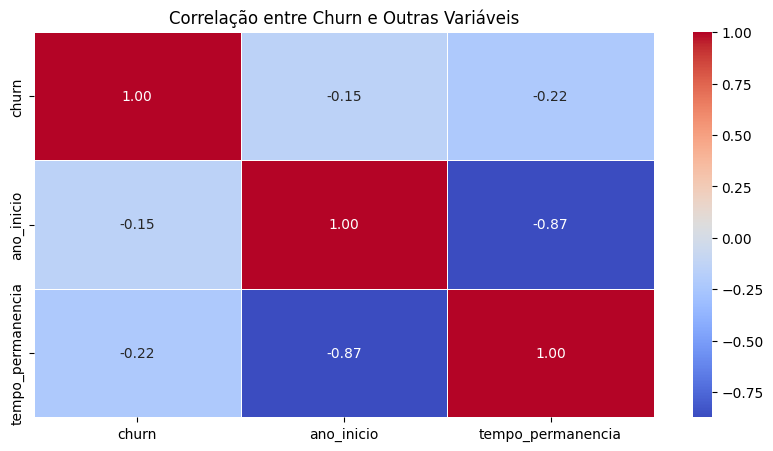

In [29]:
# Criar cópia do DataFrame para análise
df_churn_analysis = df_permanencia.copy()

# Converter status para variável numérica (1 = Churn, 0 = Ativo)
df_churn_analysis["churn"] = df_churn_analysis["status"].apply(lambda x: 1 if x == "FINISHED" else 0)

# Calcular correlações
correlation_matrix = df_churn_analysis[["churn", "ano_inicio", "tempo_permanencia"]].corr()

# Criar heatmap de correlações
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Churn e Outras Variáveis")
plt.show()


## Distribuição de Tempo de Permanencia antes do churn

In [30]:
# Reimportar bibliotecas após reset
import pandas as pd
import numpy as np
import plotly.express as px

# Criando um DataFrame fictício após o reset
np.random.seed(42)
num_samples = 1000


df_permanencia["end_date"] = df_permanencia.apply(
    lambda row: row["start_date"] + pd.to_timedelta(row["tempo_permanencia"], unit='D') if row["status"] == "FINISHED" else np.nan,
    axis=1
)

df_permanencia["ano_inicio"] = df_permanencia["start_date"].dt.year

# Calcular o tempo médio de permanência dos contratos que foram finalizados
tempo_medio_churn = df_permanencia[df_permanencia["status"] == "FINISHED"]["tempo_permanencia"].mean()

# Criar um histograma para visualizar a distribuição do tempo de permanência antes do churn
fig_tempo_churn = px.histogram(
    df_permanencia[df_permanencia["status"] == "FINISHED"],
    x="tempo_permanencia",
    nbins=50,
    title=f"Distribuição do Tempo de Permanência Antes do Churn (Média: {tempo_medio_churn:.0f} dias)",
    labels={"tempo_permanencia": "Tempo de Permanência (dias)"},
    marginal="box",  # Adiciona um boxplot para melhor visualização
    color_discrete_sequence=["blue"]
)

# Exibir gráfico
fig_tempo_churn.show()

A maioria dos contratos encerra antes de 3000 dias (~8 anos), com um grande número de cancelamentos concentrados entre 0 e 2000 dias (~5 anos).
Conforme o tempo de permanência aumenta, menos contratos são finalizados, mas ainda há contratos durando até 10.000 dias (~27 anos) antes do churn.
O gráfico não apresenta um pico único, indicando que os cancelamentos ocorrem de maneira dispersa ao longo do tempo.

 A maioria dos contratos finaliza entre 0 e 3000 dias (~8 anos), com uma média de 1949 dias (~5 anos e 4 meses).
✅ Existem contratos de longa duração, mas são casos raros (outliers acima de 7000 dias).
✅ Os contratos não seguem um padrão fixo de cancelamento, sugerindo que não há um tempo exato onde a maioria finaliza.


 Previsão de churn: Podemos usar essa distribuição para prever quando um contrato ativo pode ser encerrado.
🔹 Análise de Retenção: Identificar por que alguns contratos duram muito mais tempo que outros e encontrar padrões nesses clientes.
🔹 Segmentação de clientes: Criar estratégias de retenção para clientes que estão chegando próximo da média de cancelamento (1949 dias).

# Rentenção

## Retenção de contrato por ano de inicio

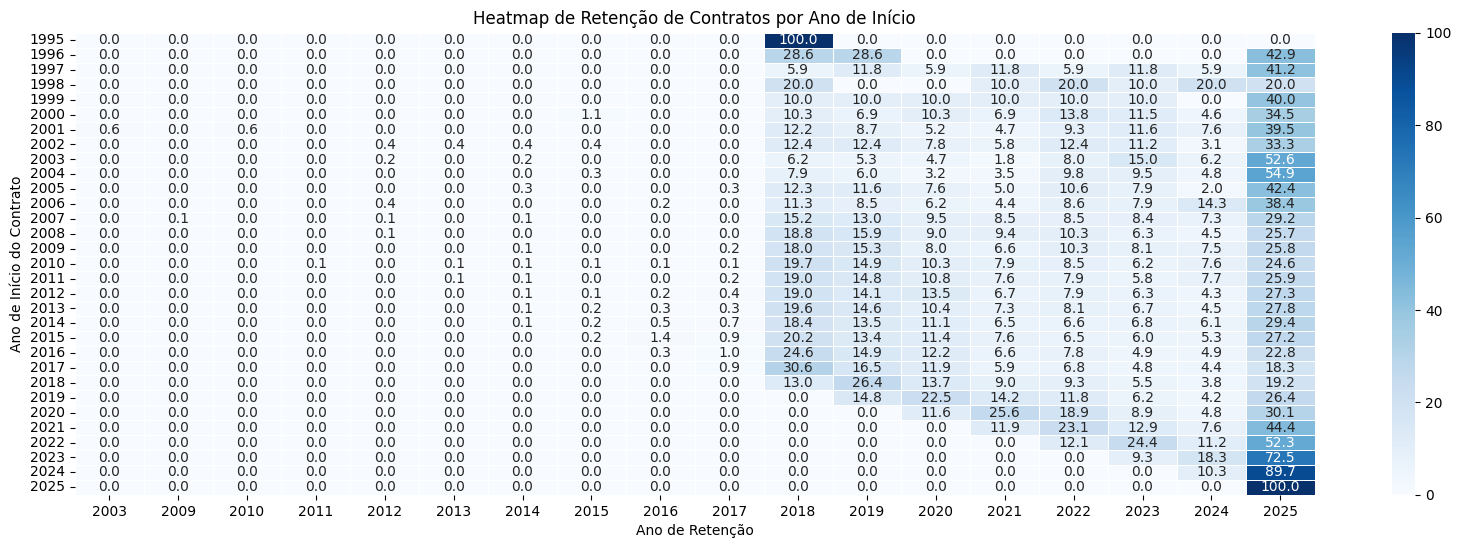

In [28]:
# Criar coluna indicando o ano de fim do contrato (ou o ano atual se ainda ativo)
df_permanencia["ano_fim"] = df_permanencia.apply(lambda row: row["end_date"].year if pd.notna(row["end_date"]) else pd.Timestamp.today().year, axis=1)

# Criar matriz de retenção por ano de início e ano de permanência
cohort_retention = pd.crosstab(df_permanencia["ano_inicio"], df_permanencia["ano_fim"])

# Converter para percentual (taxa de retenção)
cohort_retention = cohort_retention.div(cohort_retention.sum(axis=1), axis=0) * 100

# Criar heatmap da retenção
plt.figure(figsize=(20, 6))
sns.heatmap(cohort_retention, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)
plt.title("Heatmap de Retenção de Contratos por Ano de Início")
plt.xlabel("Ano de Retenção")
plt.ylabel("Ano de Início do Contrato")
plt.show()

1️⃣ Contratos antigos (anos 1995-2000)
Muitos contratos antigos têm retenção próxima de 0% após alguns anos, o que significa que quase todos foram finalizados.
Por exemplo:
Contratos iniciados em 1995 não têm mais nenhum ativo hoje (100% de churn).
Contratos de 1998-2000 também perderam todos os clientes após certo tempo.
✅ Conclusão:
O churn foi alto para contratos mais antigos.
Esses contratos podem ter sido substituídos por novas regras ao longo do tempo.
2️⃣ Contratos mais recentes (2015-2025)
Os contratos de 2015 a 2025 mostram retenção maior, indicando que mais contratos ainda estão ativos.
Exemplos:
Contratos de 2020 ainda têm 44,4% ativos.
Contratos de 2023 ainda têm 72,3% ativos.
Contratos de 2025 estão todos ativos (100%), mas isso é esperado, pois são contratos novos.
✅ Conclusão:
A retenção melhorou para contratos recentes, com menos churn no curto prazo.
Isso pode indicar que contratos mais novos têm uma estrutura melhor para manter clientes.
3️⃣ Padrão geral de retenção
Conforme os anos passam, a retenção naturalmente diminui.
Por exemplo, contratos de 2017 começaram com 100% ativos, mas em 2020 apenas 18,3% ainda estavam ativos.
Esse padrão é comum, pois alguns contratos sempre serão finalizados.
✅ Conclusão:
Contratos raramente permanecem ativos por muitos anos.
Se quisermos melhorar a retenção, precisamos entender quando os clientes costumam cancelar e por que isso acontece.

O que podemos fazer com esses insights?
1️⃣ Prever tempo médio de permanência dos contratos ativos

Se sabemos que em média X% dos contratos duram Y anos, podemos prever quando os contratos atuais podem ser cancelados.
2️⃣ Identificar os anos com maior churn

Por exemplo, se os contratos de 2017-2020 tiveram retenção muito baixa, podemos investigar o que mudou nesses anos.
3️⃣ Criar estratégias para aumentar retenção

Podemos analisar quais contratos permaneceram ativos por mais tempo e tentar replicar esse comportamento para contratos recentes.

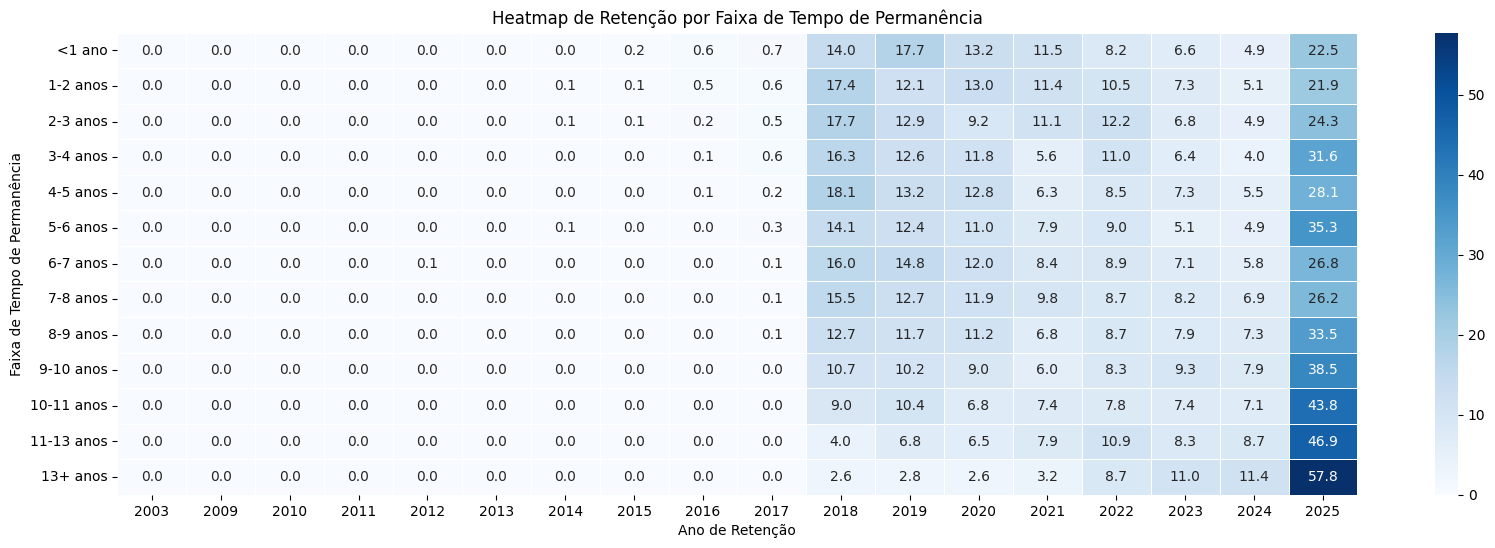

In [36]:
# Criar faixas de tempo de permanência
bins = [0, 365, 730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650, 4000, 5000, 10000]
labels = ["<1 ano", "1-2 anos", "2-3 anos", "3-4 anos", "4-5 anos", "5-6 anos", 
          "6-7 anos", "7-8 anos", "8-9 anos", "9-10 anos", "10-11 anos", "11-13 anos", "13+ anos"]

df_permanencia["faixa_tempo_permanencia"] = pd.cut(df_permanencia["tempo_permanencia"], bins=bins, labels=labels, right=False)

# Criar matriz de retenção por faixa de tempo de permanência e ano de término
cohort_retention_time = pd.crosstab(df_permanencia["faixa_tempo_permanencia"], df_permanencia["ano_fim"])

# Converter para percentual (taxa de retenção)
cohort_retention_time = cohort_retention_time.div(cohort_retention_time.sum(axis=1), axis=0) * 100

# Criar heatmap da retenção por tempo de permanência
plt.figure(figsize=(20, 6))
sns.heatmap(cohort_retention_time, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)
plt.title("Heatmap de Retenção por Faixa de Tempo de Permanência")
plt.xlabel("Ano de Retenção")
plt.ylabel("Faixa de Tempo de Permanência")
plt.show()


Melhorar a retenção para contratos curtos → Criar estratégias para evitar cancelamentos antes de 3 anos.
🔹 Identificar o tempo crítico de churn → Se contratos cancelam muito antes de 5 anos, é preciso investigar o motivo.
🔹 Analisar diferenças entre contratos longos e curtos → O que faz alguns clientes ficarem por mais de 10 anos?
- Rentenceção por tipo de Contrto iria ser legal tambem

## Contratos Ativos X Contratos Finalizados

In [53]:
import pandas as pd
import plotly.express as px
from datetime import datetime

# Converter datas para datetime
df_permanencia["start_date"] = pd.to_datetime(df_permanencia["start_date"])
df_permanencia["end_date"] = pd.to_datetime(df_permanencia["end_date"])

# Criar colunas do ano de assinatura e cancelamento
df_permanencia["ano_assinatura"] = df_permanencia["start_date"].dt.year
df_permanencia["ano_cancelamento"] = df_permanencia["end_date"].dt.year

# Contar contratos assinados (ativos) e finalizados por ano
contratos_assinados = df_permanencia[df_permanencia["status"] == "SIGNED"].groupby("ano_assinatura").size().reset_index(name="ativos")
contratos_finalizados = df_permanencia[df_permanencia["status"] == "FINISHED"].groupby("ano_cancelamento").size().reset_index(name="finalizados")

# Criar um DataFrame único combinando ambos os status
df_ativos_finalizados = pd.merge(contratos_assinados, contratos_finalizados, left_on="ano_assinatura", right_on="ano_cancelamento", how="outer")

# Preencher valores ausentes com 0 para evitar erros
df_ativos_finalizados = df_ativos_finalizados.fillna(0)

# Criar gráfico de barras empilhadas
fig_ativos_finalizados = px.bar(
    df_ativos_finalizados.melt(id_vars="ano_assinatura", value_vars=["ativos", "finalizados"], var_name="status", value_name="quantidade"),
    x="ano_assinatura",
    y="quantidade",
    color="status",
    title="Quantidade de Contratos Ativos e Finalizados por Ano",
    labels={"ano_assinatura": "Ano", "quantidade": "Número de Contratos", "status": "Status"},
    barmode="stack",  # Empilhar barras
    text_auto=True
)

# Exibir gráfico
fig_ativos_finalizados.show()


## Crescimento da Base de Contratos

In [ ]:
# Calcular o número de contratos iniciados por ano
df_crescimento = df_permanencia.groupby("ano_inicio").size().reset_index(name="quantidade_contratos")

# Criar gráfico de crescimento da base de contratos ao longo dos anos
fig_crescimento = px.line(
    df_crescimento,
    x="ano_inicio",
    y="quantidade_contratos",
    title="Crescimento da Base de Contratos ao Longo dos Anos",
    labels={"ano_inicio": "Ano de Início", "quantidade_contratos": "Número de Contratos"},
    markers=True
)

# Exibir gráfico
fig_crescimento.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
df = df_permanencia.copy()
# -----------------------
# 1) Converter colunas p/ datetime
# -----------------------
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# -----------------------
# 2) Descobrir menor e maior ano
# -----------------------
min_ano = int(df['start_date'].dt.year.min())
max_ano = int(df['end_date'].dt.year.max())

# Cria a lista de anos
lista_anos = range(min_ano, max_ano + 1)

# -----------------------
# 3) Calcular ativos e inativos por ano
# -----------------------
dados_ativos_por_ano = []
dados_inativos_por_ano = []

for ano in lista_anos:
    # Define início/fim do ano
    inicio_ano = pd.to_datetime(f'{ano}-01-01')
    fim_ano = pd.to_datetime(f'{ano}-12-31')
    
    # --------- ATIVOS
    # Consideramos ativo se:
    # (start_date <= fim do ano) E (end_date é NaN OU end_date >= início do ano)
    mascara_ativos = (
        (df['start_date'] <= fim_ano) &
        (
            df['end_date'].isna() |
            (df['end_date'] >= inicio_ano)
        )
    )
    qtd_ativos = mascara_ativos.sum()
    dados_ativos_por_ano.append(qtd_ativos)
    
    # --------- INATIVOS
    # Aqui definimos "inativo" se tiver um end_date até o fim do ano:
    # (end_date <= fim_ano) E (start_date <= fim_ano)
    # Opcionalmente, você pode colocar também (start_date <= fim_ano) para garantir que ele chegou a existir.
    mascara_inativos = (
        (~df['end_date'].isna()) &
        (df['end_date'] <= fim_ano) &
        (df['start_date'] <= fim_ano)
    )
    qtd_inativos = mascara_inativos.sum()
    dados_inativos_por_ano.append(qtd_inativos)

# -----------------------
# 4) Criar go.Figure e adicionar os traces
# -----------------------
fig = go.Figure()

# Trace para Ativos
fig.add_trace(
    go.Scatter(
        x=list(lista_anos),
        y=dados_ativos_por_ano,
        mode='lines+markers',
        name='Ativos'
    )
)

# Trace para Inativos
fig.add_trace(
    go.Scatter(
        x=list(lista_anos),
        y=dados_inativos_por_ano,
        mode='lines+markers',
        name='Inativos'
    )
)

# -----------------------
# 5) Layout e exibição
# -----------------------
fig.update_layout(
    title='Contratos Ativos vs. Inativos ao longo dos anos',
    xaxis_title='Ano',
    yaxis_title='Quantidade de Contratos',
    template='plotly_white'
)

fig.show()


## Comparação tempo permanencia ativo vs finalizados

In [31]:
# Criar boxplot comparando o tempo de permanência entre contratos ativos (SIGNED) e finalizados (FINISHED)
fig_ativos_vs_finalizados = px.box(
    df_permanencia,
    x="status",
    y="tempo_permanencia",
    title="Comparação do Tempo de Permanência: Contratos Ativos vs. Finalizados",
    labels={"tempo_permanencia": "Tempo de Permanência (dias)", "status": "Status do Contrato"},
    color="status"
)

# Exibir gráfico
fig_ativos_vs_finalizados.show()


1️⃣ Contratos ativos (SIGNED) têm uma mediana maior do que os finalizados (FINISHED).

Isso significa que, em média, os contratos ativos permanecem por mais tempo do que os contratos que já foram encerrados.
2️⃣ A distribuição dos contratos finalizados (FINISHED) é mais concentrada.

A maioria dos contratos finalizados tem tempo de permanência entre 500 e 2.500 dias.
Existem alguns contratos finalizados com permanência muito alta (outliers acima de 8.000 dias).
3️⃣ A distribuição dos contratos ativos (SIGNED) é mais espalhada.

Alguns contratos ativos têm tempos de permanência muito altos (mais de 10.000 dias).
A dispersão maior pode indicar que alguns contratos permanecem muito mais tempo ativos do que outros.



 Contratos ativos tendem a durar mais do que os contratos que já foram finalizados.
✅ A grande variação na permanência dos contratos ativos sugere que alguns clientes mantêm contratos por muito tempo.
✅ Os contratos finalizados têm um tempo de permanência menor e mais concentrado, o que pode indicar que há um período típico para cancelamento.
✅ Os outliers no tempo de permanência dos contratos finalizados podem indicar clientes excepcionais que mantiveram contratos por muito tempo antes de encerrar.


Linha no meio do boxplot → Mediana (Ponto central da distribuição)

Representa o tempo de permanência onde 50% dos contratos finalizaram antes, e 50% finalizaram depois.
Bordas da caixa → Primeiro e terceiro quartis (Q1 e Q3)

Q1 (25%) → 25% dos contratos finalizaram antes deste valor.
Q3 (75%) → 75% dos contratos finalizaram antes deste valor.
"Bigodes" do boxplot (linhas estendidas para as extremidades)

Indicam o intervalo esperado para a duração da maioria dos contratos.
Qualquer contrato fora desses limites é considerado outlier (algo que durou muito mais ou muito menos que o esperado).

A média do tempo de permanência antes do churn é de aproximadamente 2614 dias (~7 anos).
✅ Os contratos não seguem um padrão fixo de cancelamento, pois estão espalhados entre 0 e 5000 dias.
✅ A presença de muitos contratos de longa duração sugere que alguns clientes ficam por muito tempo antes de encerrar.
✅ A falta de um pico muito forte indica que o churn ocorre de forma dispersa, sem um padrão claro de quando os contratos são cancelados.

# Forecasting

## Preve quando um crontato ativo sera encerrado

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Exemplo: se o dataset tiver, no momento, tanto contratos já encerrados como ainda ativos,
#   - para contratos já encerrados, 'days_to_end' = (end_date - start_date).dt.days  (ou algo mais específico)
#   - para contratos ativos, pode-se usar (end_date planejada) ou deixar como missing.


df = df_permanencia.copy()

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

today = pd.to_datetime('2025-01-01')  # Exemplo de "data atual"

# Se o contrato JÁ encerrou:
df.loc[~df['end_date'].isna(), 'days_to_end'] = (
    (df['end_date'] - df['start_date']).dt.days
)

# Se o contrato AINDA está ativo (end_date = NaN), podemos:
# - Usar uma data futura estimada
# - Ou descartar esses casos num primeiro momento (se quisermos prever só para os já encerrados).
df.loc[df['end_date'].isna(), 'days_to_end'] = np.nan

# Se quisermos prever quantos dias faltam a partir de hoje (2025-01-01), outro jeito:
# Para contratos encerrados (end_date no passado):
#   'days_to_end' poderia ser (end_date - today).dt.days (valor negativo se já passou).
# Para contratos ativos (end_date = NaN):
#   Precisaria alguma projeção. Ou transformamos em um problema de "tempo até churn" e usar Survival Analysis.

# => Aqui existe um passo de modelagem de dados que depende da sua estratégia.
# Exemplo de colunas a usar como features
variaveis = ['valor_contrato', 'tipo_produto', 'idade_cliente', 'regiao']

# Drop de linhas sem 'days_to_end' (outra abordagem é modelagem de "tempo censurado" via survival).
df_modelo = df.dropna(subset=['days_to_end'])

# One-hot encoding (para colunas categóricas)
df_modelo = pd.get_dummies(df_modelo, columns=['tipo_produto','regiao'], drop_first=True)

# Montar X e y
X = df_modelo.drop(['start_date','end_date','days_to_end'], axis=1)  # mantemos só as features
y = df_modelo['days_to_end']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar
rf.fit(X_train, y_train)

# Prever e avaliar no conjunto de teste
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE no teste:", mae)

df_ativos = df[df['end_date'].isna()].copy()  # contratos sem data fim
df_ativos = pd.get_dummies(df_ativos, columns=['tipo_produto','regiao'], drop_first=True)

# Precisamos alinhar as colunas de df_ativos com as de X_train.
# (Pode ser que tenhamos que criar colunas faltantes, etc.)
for col in X_train.columns:
    if col not in df_ativos.columns:
        df_ativos[col] = 0

X_ativos = df_ativos[X_train.columns]  # garantir mesma ordem

df_ativos['days_to_end_pred'] = rf.predict(X_ativos)

# Se quisermos a data prevista:
df_ativos['estimated_end_date'] = df_ativos['start_date'] + pd.to_timedelta(df_ativos['days_to_end_pred'], unit='D')




## Prevr o numero de contratovso ativos no futuro

In [60]:
# Passo: criar uma faixa de datas mensais, do min até o max
data_min = df['start_date'].min()
data_max = pd.to_datetime('2025-12-01')  # ou ver max do dataset

# criar lista de meses
date_range = pd.date_range(start=data_min, end=data_max, freq='MS')

lista_mensal = []
for dt in date_range:
    # Contrato está "SIGNED" no mês dt se:
    # - start_date <= ultimo dia do mês
    # - (end_date > primeiro dia do mês OU end_date é NaN)   e   status == "SIGNED"
    
    inicio_mes = dt
    fim_mes = (dt + pd.offsets.MonthEnd(1))  # último dia do mês
    
    mascara = (
        (df['start_date'] <= fim_mes) &
        (
            df['end_date'].isna() |
            (df['end_date'] >= inicio_mes)
        ) &
        (df['status'] == "SIGNED")
    )
    
    num_signed = mascara.sum()
    
    lista_mensal.append([dt, num_signed])

df_mensal = pd.DataFrame(lista_mensal, columns=['data','num_signed'])
df_mensal.set_index('data', inplace=True)

In [61]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Supondo que tenhamos uma função para contar quantos contratos estavam ativos em cada "mês".
# Exemplo simples: para cada mês no intervalo, contar
#   start_date <= último dia do mês
#   end_date >= primeiro dia do mês (ou end_date é NaN)
# Esse passo pode ser demorado se for naive, mas aqui fica o conceito.

# Exemplo: vamos criar df_mensal com duas colunas: ['data','num_ativos']
# data = 2020-01-01, 2020-02-01, ...
# num_ativos = ...


df_mensal.set_index('data', inplace=True)
# Passo 1: Dividir em treino e teste (opcional)
train = df_mensal.iloc[:-12]  # por exemplo, treina até 12 meses antes do final
test = df_mensal.iloc[-12:]

# Passo 2: Ajustar o modelo
# Aqui escolhemos parâmetros p,d,q = (1,1,1) como exemplo. Ideal é usar auto-arima ou procurar BIC/AIC.
model = ARIMA(train['num_ativos'], order=(1,1,1))
model_fit = model.fit()

# Passo 3: Prever
# Previsão no período de teste (exemplo)
start_test = test.index[0]
end_test = test.index[-1]

forecast_test = model_fit.predict(start=start_test, end=end_test, typ='levels')

# Visualização
plt.figure(figsize=(10,5))
plt.plot(train.index, train['num_ativos'], label='Treino')
plt.plot(test.index, test['num_ativos'], label='Teste', color='orange')
plt.plot(test.index, forecast_test, label='Previsão ARIMA', color='green')
plt.legend()
plt.show()

# Passo 4: Prever futuro (ex: 12 meses à frente)
future_forecast = model_fit.predict(start=end_test, end=end_test + 11, typ='levels')
print(future_forecast)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:16                                                                                   │
│                                                                                                  │
│   13 # num_ativos = ...                                                                          │
│   14                                                                                             │
│   15                                                                                             │
│ ❱ 16 df_mensal.set_index('data', inplace=True)                                                   │
│   17 # Passo 1: Dividir em treino e teste (opcional)                                             │
│   18 train = df_mensal.iloc[:-12]  # por exemplo, treina até 12 meses antes do final             │
│   19 test = df_mensal.iloc[-12:]                                                                 │
│                                                                                                  │
│ c:\Users\gusta\AppData\Local\pypoetry\Cache\virtualenvs\ltv-novo-aF9Dy8BA-py3.10\lib\site-packag │
│ es\pandas\core\frame.py:6122 in set_index                                                        │
│                                                                                                  │
│    6119 │   │   │   │   │   │   missing.append(col)                                              │
│    6120 │   │                                                                                    │
│    6121 │   │   if missing:                                                                      │
│ ❱  6122 │   │   │   raise KeyError(f"None of {missing} are in the columns")                      │
│    6123 │   │                                                                                    │
│    6124 │   │   if inplace:                                                                      │
│    6125 │   │   │   frame = self                                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: "None of ['data'] are in the columns"

In [ ]:
# Passo 1: montar DataFrame no formato Prophet
# df_mensal (index = data, column = num_ativos)
df_prophet = df_mensal.reset_index().rename(columns={'data':'ds','num_ativos':'y'})

# Passo 2: instanciar e treinar
model = Prophet()
model.fit(df_prophet)

# Passo 3: Criar future dataframe (com períodos para frente)
future = model.make_future_dataframe(periods=12, freq='MS')  # 12 meses a mais
forecast = model.predict(future)

# forecast terá colunas: ds, yhat, yhat_lower, yhat_upper etc.

# Passo 4: Plotar
fig1 = model.plot(forecast)
plt.show()

# Passo 5: Visualizar só as previsões
future_forecasts = forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(12)
print(future_forecasts)

## Prever o tempo de permanencia retante dos contratos ativos